In [58]:
import pandas as pd
import numpy as np
import sklearn 
import pandasql
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
all_news = pd.read_csv('Combined_News_DJIA.csv', sep=',')
red_news = pd.read_csv('RedditNews.csv', sep=',')
stocks = pd.read_csv('upload_DJIA_table.csv', sep=',')

In [3]:
stocks['Prev_Close'] = stocks['Close'].shift(-1)
stocks['Day_Change'] = stocks['Close']-stocks['Prev_Close']
stocks['Change_Type'] = np.where(stocks['Day_Change']>0,'pos','neg')
stocks['Day_Pct_Change'] = round((stocks['Day_Change']/stocks['Prev_Close'])*100,2)
stocks['Year'] = stocks['Date'].str[:4]
stocks.dropna(inplace=True)

In [4]:
stocks.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close,Prev_Close,Day_Change,Change_Type,Day_Pct_Change,Year
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,17929.990234,19.378907,pos,0.11,2016
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,17694.679688,235.310546,pos,1.33,2016
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,17409.720703,284.958985,pos,1.64,2016
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,17140.240234,269.480469,pos,1.57,2016
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,17400.750000,-260.509766,neg,-1.50,2016
5,2016-06-24,17946.630859,17946.630859,17356.339844,17400.750000,239000000,17400.750000,18011.070312,-610.320312,neg,-3.39,2016
6,2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312,17780.830078,230.240234,pos,1.29,2016
7,2016-06-22,17832.669922,17920.160156,17770.359375,17780.830078,89440000,17780.830078,17829.730469,-48.900391,neg,-0.27,2016
8,2016-06-21,17827.330078,17877.839844,17799.800781,17829.730469,85130000,17829.730469,17804.869141,24.861328,pos,0.14,2016
9,2016-06-20,17736.869141,17946.359375,17736.869141,17804.869141,99380000,17804.869141,17675.160156,129.708985,pos,0.73,2016


In [5]:
stocks['Close'].pct_change()

0            NaN
1      -0.001080
2      -0.013124
3      -0.016104
4      -0.015479
          ...   
1983    0.015725
1984   -0.003771
1985   -0.007143
1986    0.009495
1987    0.012015
Name: Close, Length: 1988, dtype: float64

In [6]:
# df = lambda q:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [7]:
print(pysqldf("SELECT * FROM stocks WHERE YEAR = 2012 ORDER BY YEAR ASC LIMIT 100"))

          Date          Open          High           Low         Close  \
0   2012-12-31  12938.190430  13109.129883  12883.889648  13104.139648   
1   2012-12-28  13095.080078  13095.459961  12926.860352  12938.110352   
2   2012-12-27  13114.969727  13141.740234  12964.080078  13096.309570   
3   2012-12-26  13138.849609  13174.879883  13076.870117  13114.589844   
4   2012-12-24  13190.150391  13190.379883  13128.549805  13138.929688   
..         ...           ...           ...           ...           ...   
95  2012-08-13  13204.929688  13205.009766  13112.940430  13169.429688   
96  2012-08-10  13163.150391  13208.219727  13094.959961  13207.950195   
97  2012-08-09  13174.730469  13200.230469  13125.089844  13165.190430   
98  2012-08-08  13158.099609  13202.650391  13115.240234  13175.639648   
99  2012-08-07  13118.650391  13215.969727  13118.419922  13168.599609   

       Volume     Adj Close    Prev_Close  Day_Change Change_Type  \
0   145740000  13104.139648  12938.110352 

In [8]:
print(pysqldf("SELECT YEAR, sum(Day_Pct_Change) over (PARTITION BY YEAR) as Annual_Change FROM stocks GROUP BY 1 ORDER BY YEAR ASC"))

   Year  Annual_Change
0  2008           1.25
1  2009          -1.14
2  2010           0.07
3  2011          -0.57
4  2012           1.28
5  2013           0.44
6  2014          -0.89
7  2015          -1.02
8  2016           0.11


In [9]:
print(pysqldf("SELECT YEAR, sum(Day_Change) over (PARTITION BY YEAR) as Annual_Change FROM stocks GROUP BY 1 ORDER BY YEAR ASC"))

   Year  Annual_Change
0  2008     108.000000
1  2009    -120.459961
2  2010       7.799805
3  2011     -69.480469
4  2012     166.029296
5  2013      72.371094
6  2014    -160.000000
7  2015    -178.839844
8  2016      19.378907


In [10]:
red_news.head(20)

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...
5,2016-07-01,Brazil: Huge spike in number of police killing...
6,2016-07-01,Austria's highest court annuls presidential el...
7,2016-07-01,"Facebook wins privacy case, can track any Belg..."
8,2016-07-01,Switzerland denies Muslim girls citizenship af...
9,2016-07-01,China kills millions of innocent meditators fo...


In [11]:
red_news['News'][7]

"Facebook wins privacy case, can track any Belgian it wants: Doesn't matter if Internet users are logged into Facebook or not"

In [12]:
sent = TextBlob(red_news['News'][7]) 

In [15]:
sent.sentiment 

Sentiment(polarity=0.25, subjectivity=0.15000000000000002)

In [16]:
red_news['sentiment'] = red_news['News'].apply(lambda News: TextBlob(News).sentiment[0])

In [17]:
red_news.head(20)

,Date,News,sentiment
0,2016-07-01,A 117-year-old woman in Mexico City finally re...,-0.066667
1,2016-07-01,IMF chief backs Athens as permanent Olympic host,0.000000
2,2016-07-01,"The president of France says if Brexit won, so...",0.000000
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...,0.111111
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...,0.000000
5,2016-07-01,Brazil: Huge spike in number of police killing...,0.400000
6,2016-07-01,Austria's highest court annuls presidential el...,-0.200000
7,2016-07-01,"Facebook wins privacy case, can track any Belg...",0.250000
8,2016-07-01,Switzerland denies Muslim girls citizenship af...,0.000000
9,2016-07-01,China kills millions of innocent meditators fo...,0.500000


In [18]:
print(pysqldf("SELECT Date, sum(sentiment) over (PARTITION BY Date) as Daily_Sent FROM red_news GROUP BY 1 ORDER BY Date DESC"))

            Date  Daily_Sent
0     2016-07-01   -0.066667
1     2016-06-30    0.000000
2     2016-06-29    0.000000
3     2016-06-28    0.525000
4     2016-06-27    0.500000
...          ...         ...
2938  2008-06-12   -0.100000
2939  2008-06-11    0.000000
2940  2008-06-10    0.000000
2941  2008-06-09    0.000000
2942  2008-06-08    0.000000

[2943 rows x 2 columns]


In [42]:
daily_sentiment = pd.DataFrame(pysqldf("SELECT Date, sum(sentiment) over (PARTITION BY Date) as Daily_Sent FROM red_news GROUP BY 1 ORDER BY Date DESC"))

In [43]:
daily_sentiment.head()

,Date,Daily_Sent
0,2016-07-01,-0.066667
1,2016-06-30,0.000000
2,2016-06-29,0.000000
3,2016-06-28,0.525000
4,2016-06-27,0.500000


In [194]:
daily_sentiment['Lag_1_Day'] = daily_sentiment['Daily_Sent'].shift(-1)
daily_sentiment['Lag_2_Day'] = daily_sentiment['Daily_Sent'].shift(-2)
daily_sentiment['Lag_3_Day'] = daily_sentiment['Daily_Sent'].shift(-3)
daily_sentiment['Lag_4_Day'] = daily_sentiment['Daily_Sent'].shift(-4)
daily_sentiment['Lag_5_Day'] = daily_sentiment['Daily_Sent'].shift(-5)
daily_sentiment['Lag_6_Day'] = daily_sentiment['Daily_Sent'].shift(-6)
daily_sentiment['Lag_7_Day'] = daily_sentiment['Daily_Sent'].shift(-7)
daily_sentiment.dropna(inplace=True)

In [195]:
daily_sentiment.head(20)

,Date,Daily_Sent,1_Day_Lag,2_Day_Lag,3_Day_Lag,4_Day_Lag,5_Day_Lag,6_Day_Lag,7_Day_Lag,Cum_1_Day,...,Cum_5_Day,Cum_6_Day,Cum_7_Day,Lag_1_Day,Lag_2_Day,Lag_3_Day,Lag_4_Day,Lag_5_Day,Lag_6_Day,Lag_7_Day
0,2016-07-01,-0.066667,0.000000,0.000000,0.525000,0.500000,0.000000,0.000000,0.000000,-0.066667,...,0.958333,0.958333,0.958333,0.000000,0.000000,0.525000,0.500000,0.000000,0.000000,0.000000
1,2016-06-30,0.000000,0.000000,0.525000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.025000,1.025000,1.025000,0.000000,0.525000,0.500000,0.000000,0.000000,0.000000,0.000000
2,2016-06-29,0.000000,0.525000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525000,...,1.025000,1.025000,1.025000,0.525000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2016-06-28,0.525000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.025000,...,1.025000,1.025000,1.025000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2016-06-27,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2016-06-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2016-06-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2016-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,...,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000
8,2016-06-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,...,0.000000,-0.200000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000
9,2016-06-22,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.416667,0.000000,...,-0.200000,-0.200000,0.216667,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.416667


In [196]:
daily_sentiment['Cum_1_Day'] = daily_sentiment['Daily_Sent'] + daily_sentiment['Lag_1_Day']
daily_sentiment['Cum_2_Day'] = daily_sentiment['Cum_1_Day'] + daily_sentiment['Lag_2_Day']
daily_sentiment['Cum_3_Day'] = daily_sentiment['Cum_2_Day'] + daily_sentiment['Lag_3_Day']
daily_sentiment['Cum_4_Day'] = daily_sentiment['Cum_3_Day'] + daily_sentiment['Lag_4_Day']
daily_sentiment['Cum_5_Day'] = daily_sentiment['Cum_4_Day'] + daily_sentiment['Lag_5_Day']
daily_sentiment['Cum_6_Day'] = daily_sentiment['Cum_5_Day'] + daily_sentiment['Lag_6_Day']
daily_sentiment['Cum_7_Day'] = daily_sentiment['Cum_6_Day'] + daily_sentiment['Lag_7_Day']

In [197]:
daily_sentiment.head(20)

,Date,Daily_Sent,1_Day_Lag,2_Day_Lag,3_Day_Lag,4_Day_Lag,5_Day_Lag,6_Day_Lag,7_Day_Lag,Cum_1_Day,...,Cum_5_Day,Cum_6_Day,Cum_7_Day,Lag_1_Day,Lag_2_Day,Lag_3_Day,Lag_4_Day,Lag_5_Day,Lag_6_Day,Lag_7_Day
0,2016-07-01,-0.066667,0.000000,0.000000,0.525000,0.500000,0.000000,0.000000,0.000000,-0.066667,...,0.958333,0.958333,0.958333,0.000000,0.000000,0.525000,0.500000,0.000000,0.000000,0.000000
1,2016-06-30,0.000000,0.000000,0.525000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.025000,1.025000,1.025000,0.000000,0.525000,0.500000,0.000000,0.000000,0.000000,0.000000
2,2016-06-29,0.000000,0.525000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525000,...,1.025000,1.025000,1.025000,0.525000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2016-06-28,0.525000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.025000,...,1.025000,1.025000,1.025000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2016-06-27,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2016-06-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2016-06-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2016-06-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,...,0.000000,0.000000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000
8,2016-06-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.000000,...,0.000000,-0.200000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000
9,2016-06-22,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.416667,0.000000,...,-0.200000,-0.200000,0.216667,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,0.416667


In [198]:
print(pysqldf("SELECT * FROM stocks a JOIN daily_sentiment b ON a.Date = b.Date"))

            Date          Open          High           Low         Close  \
0     2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1     2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2     2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3     2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4     2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
...          ...           ...           ...           ...           ...   
1983  2008-08-15  11611.209961  11709.889648  11599.730469  11659.900391   
1984  2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   
1985  2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
1986  2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
1987  2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   

         Volume     Adj Close    Prev_Close  Day_Change Change_Type  ...  \
0      8216

In [199]:
analysis_set = pd.DataFrame(pysqldf("SELECT a.*, Daily_Sent, Lag_1_Day,  Lag_2_Day,  Lag_3_Day, Lag_4_Day,  Lag_5_Day,  Lag_6_Day,  Lag_7_Day,  Cum_1_Day,  Cum_2_Day,  Cum_3_Day, Cum_4_Day,  Cum_5_Day,  Cum_6_Day,  Cum_7_Day, CASE WHEN Change_Type = 'pos' THEN 1 ELSE 0 END AS Pos_Change FROM stocks a JOIN daily_sentiment b ON a.Date = b.Date"))

In [200]:
analysis_set.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Prev_Close,Day_Change,Change_Type,...,Lag_6_Day,Lag_7_Day,Cum_1_Day,Cum_2_Day,Cum_3_Day,Cum_4_Day,Cum_5_Day,Cum_6_Day,Cum_7_Day,Pos_Change
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,17929.990234,19.378907,pos,...,0.0,0.0,-0.066667,-0.066667,0.458333,0.958333,0.958333,0.958333,0.958333,1
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,17694.679688,235.310546,pos,...,0.0,0.0,0.000000,0.525000,1.025000,1.025000,1.025000,1.025000,1.025000,1
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,17409.720703,284.958985,pos,...,0.0,0.0,0.525000,1.025000,1.025000,1.025000,1.025000,1.025000,1.025000,1
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,17140.240234,269.480469,pos,...,0.0,0.0,1.025000,1.025000,1.025000,1.025000,1.025000,1.025000,1.025000,1
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,17400.750000,-260.509766,neg,...,0.0,0.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0


In [171]:
set1 = pd.DataFrame(pysqldf("SELECT Cum_1_Day, Pos_Change FROM analysis_set"))

In [172]:
X = analysis_set['Cum_7_Day']
y = analysis_set['Pos_Change']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
np.array(X.to_numpy())
X_train = X_train.values.reshape(-1,1)
np.array(X_test.to_numpy())
X_test = X_test.values.reshape(-1,1)

In [230]:
clf = svm.SVC(kernel='rbf', C=1)
clf.fit(X_train, y_train)

SVC(C=1)

In [231]:
# print(clf.predict())
clf.score(X_test,y_test)

0.5527638190954773

In [232]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train)

SVC(kernel='linear')

In [229]:
clf2.score(X_test,y_test)

0.5527638190954773

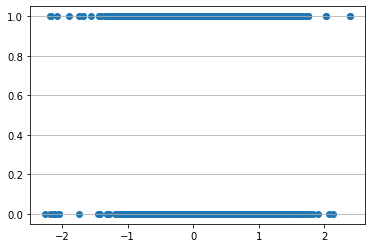

In [181]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
# axis.set_title(indicatorsFilter[0],fontsize=10)
# axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
# axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = analysis_set['Cum_7_Day']
Y = analysis_set['Pos_Change']

axis.scatter(X, Y)

# ogmovies['rating'].hist(range = (0,5),figsize=(15,10))

AttributeError: module 'numpy' has no attribute 'datetime'

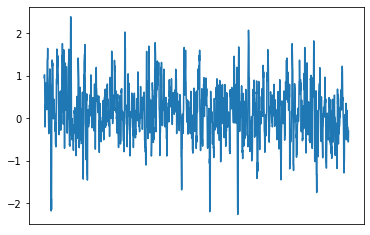

In [216]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
# with cbook.get_sample_data('goog.npz') as datafile:
data = analysis_set[['Date','Cum_7_Day']]

fig, ax = plt.subplots()
ax.plot('Date', 'Cum_7_Day', data=data)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime(analysis_set['Date'].min(),'Y')
datemax = np.datetime(analysis_set['Date'].max(),'Y') #+ np.timedelta64(1, 'Y')
# datemin = analysis_set['Date'].min()
# datemax = analysis_set['Date'].max() #+ np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [206]:
# analysis_set['Date'].max()

'2016-07-01'

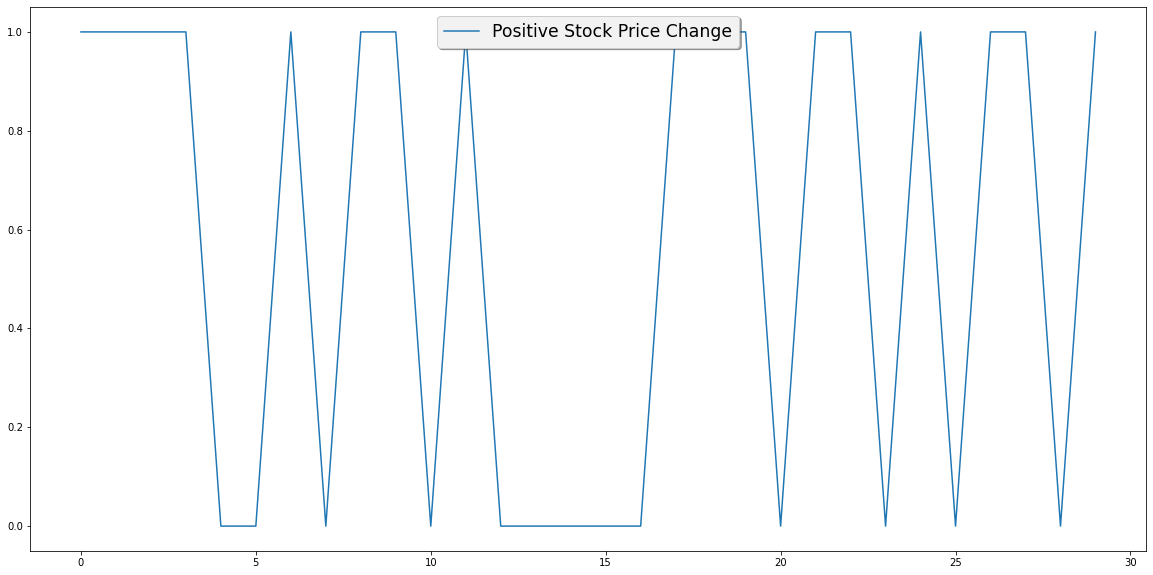

In [218]:
fig, ax = plt.subplots(figsize=(20, 10))

# ax.set_xlim(analysis_set['Date'].min(), analysis_set['Date'].max())
# ax.set_title('Indicator Name : ' + indicatorsFilter[0])
# ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 
ax.plot(analysis_set['Pos_Change'][:30], label='Positive Stock Price Change') 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

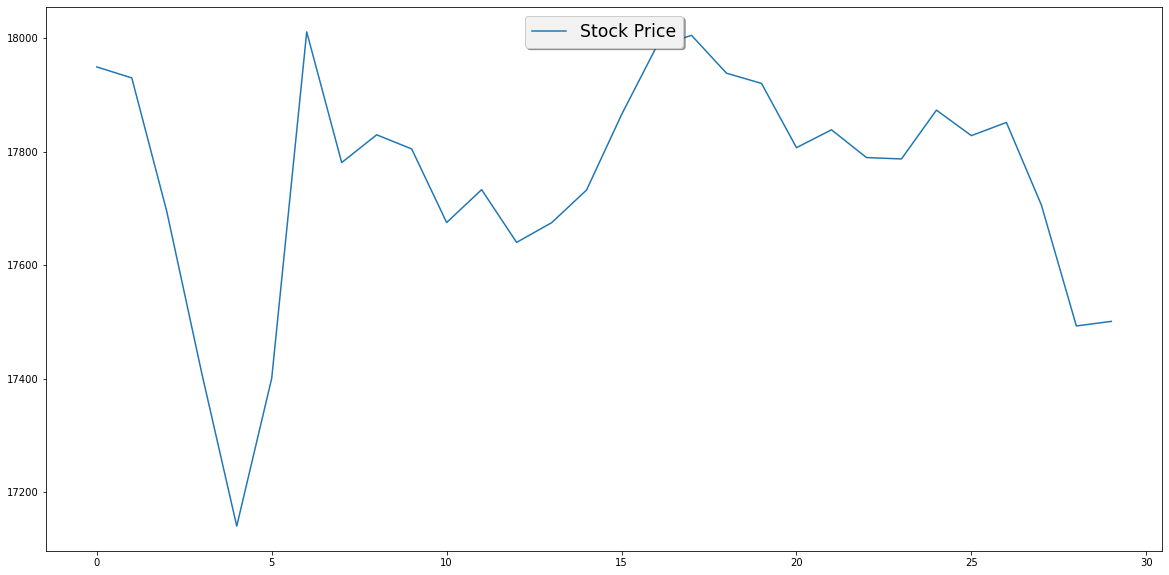

In [221]:
fig, ax = plt.subplots(figsize=(20, 10))

# ax.set_xlim(analysis_set['Date'].min(), analysis_set['Date'].max())
# ax.set_title('Indicator Name : ' + indicatorsFilter[0])
# ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 
ax.plot(analysis_set['Close'][:30], label='Stock Price') 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

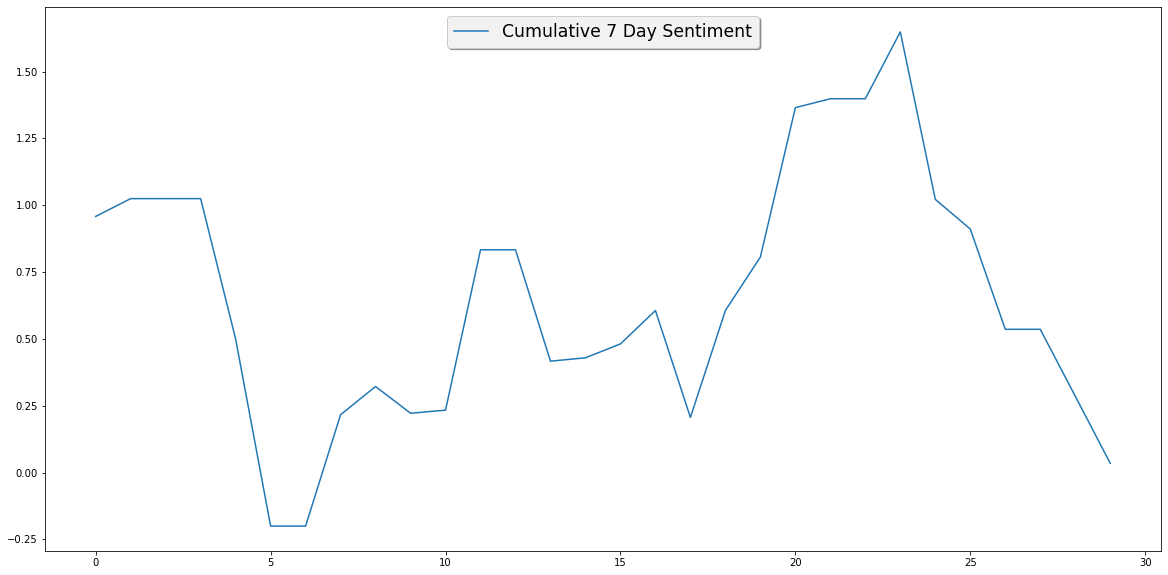

In [220]:
fig, ax = plt.subplots(figsize=(20, 10))

# ax.set_xlim(analysis_set['Date'].min(), analysis_set['Date'].max())
# ax.set_title('Indicator Name : ' + indicatorsFilter[0])
# ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 
ax.plot(analysis_set['Cum_7_Day'][:30], label='Cumulative 7 Day Sentiment') 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

In [161]:
analysis_set.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Prev_Close,Day_Change,Change_Type,...,6_Day_Lag,7_Day_Lag,Cum_1_Day,Cum_2_Day,Cum_3_Day,Cum_4_Day,Cum_5_Day,Cum_6_Day,Cum_7_Day,Pos_Change
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,17929.990234,19.378907,pos,...,0.0,0.0,-0.066667,-0.066667,0.458333,0.958333,0.958333,0.958333,0.958333,1
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,17694.679688,235.310546,pos,...,0.0,0.0,0.000000,0.525000,1.025000,1.025000,1.025000,1.025000,1.025000,1
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,17409.720703,284.958985,pos,...,0.0,0.0,0.525000,1.025000,1.025000,1.025000,1.025000,1.025000,1.025000,1
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,17140.240234,269.480469,pos,...,0.0,0.0,1.025000,1.025000,1.025000,1.025000,1.025000,1.025000,1.025000,1
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,17400.750000,-260.509766,neg,...,0.0,0.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0


In [162]:
del analysis_set['Pos_Change']
# X2 = analysis_set.drop(analysis_set['Pos_Change'],1,inplace=True)

In [163]:
X2 = analysis_set

In [164]:
# X2.head()
# X2.shape
y.dropna(inplace=True)
y.shape

(1988,)

In [165]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [166]:
np.array(X2.to_numpy())
# X2_train = X2_train.values.reshape(-1,1)
np.array(X2_test.to_numpy())
# X2_test = X2_test.values.reshape(-1,1)

array([['2011-07-13', 12447.330078, 12611.040039, ..., 0.6, 0.7,
        0.7999999999999999],
       ['2013-07-01', 14911.599609, 15083.280272999998, ...,
        -0.5722222222222222, -0.4888888888888889, -0.5888888888888889],
       ['2011-01-07', 11696.860352, 11726.94043, ..., 0.3708333333333333,
        0.3708333333333333, 0.3708333333333333],
       ...,
       ['2014-06-18', 16806.119141, 16911.410156, ...,
        0.12888257575757578, 0.12888257575757578, 0.028882575757575774],
       ['2011-08-25', 11321.019531, 11406.389648, ...,
        0.19166666666666668, 0.22366666666666668, 0.22366666666666668],
       ['2015-07-21', 18096.669922, 18096.669922, ...,
        -0.14924242424242418, -0.6492424242424242, -0.5128787878787878]],
      dtype=object)

In [167]:
clf = svm.SVC(kernel='rbf', C=.6)
clf.fit(X2_train, y_train)

ValueError: could not convert string to float: '2012-01-10'